# PSTAT: plot basic statistics

Philipp Schlatter 2024

In [1]:
%matplotlib inline
import sys
import numpy as np
import scipy.linalg as scla
import matplotlib.pyplot as plt
import math as mt
import matplotlib.pylab as pylab
import os
from chebdif import chebdif
import pandas as pd


In [2]:
stat = np.loadtxt('stat_bud.data')

re=4200
y=stat[:,0]
ny=stat.shape[0]
y_,D_=chebdif(ny,1)
D=D_[0,:,:]

In [3]:
stat = np.loadtxt('stat_vel.data')
re=4200
y=stat[:,0]
ny=stat.shape[0]
y_,D_=chebdif(ny,1)
D=D_[0,:,:]

In [4]:
dudy = D@stat[:,1]
utau = np.sqrt((dudy[-1]-dudy[0])/2/re);
lstar = 1/utau/re;
retau = 1/lstar
print('Re=%.5f Retau=%.5f' % (re,retau) )

Re=4200.00000 Retau=189.13270


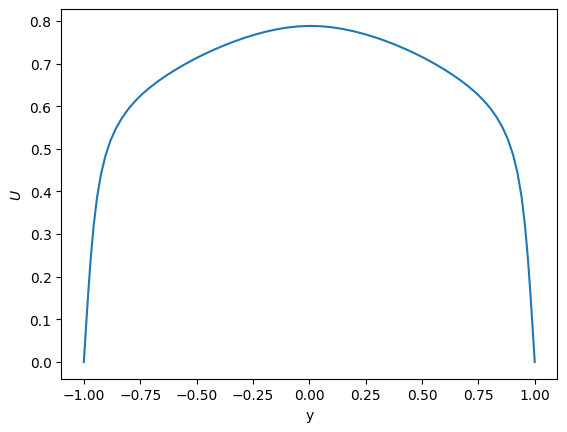

In [5]:
u = stat[:,1]
fig=plt.figure()
plt.plot(y,u)
plt.xlabel(r'y')
plt.ylabel(r'$U$')
plt.show()

[  0.           0.22781863   0.91072567   2.04707594   3.63413188
   5.66807012   8.14399074  11.05592903  14.39686986  18.15876462
  22.33255058  26.90817271  31.87460796  37.21989173  42.93114677
  48.99461417  55.3956865   62.11894302  69.14818682  76.46648383
  84.05620363  91.89906193  99.97616458 108.26805315 116.75475175
 125.41581517 134.23037816 143.17720567 152.23474399 161.38117273
 170.59445734 179.85240221]


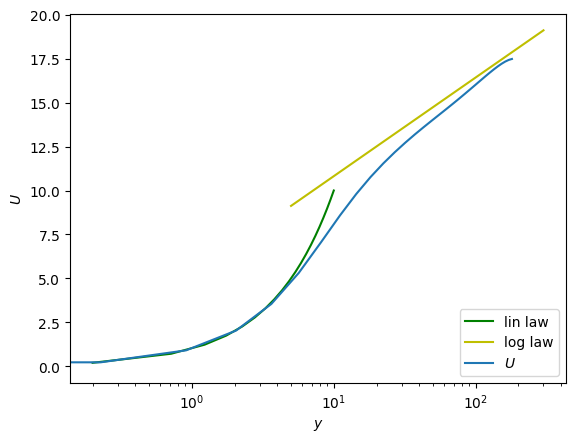

In [6]:
# compute uplus (including average over the two channel sides) and yplus
yp = (y[0:int(ny/2)]+1)/lstar
print(yp)
up = (u[0:int(ny/2)] + u[ny-1:int(ny/2):-1])/2/utau

fig=plt.figure()
# lin law
ypp=np.linspace(0.2,10,20);
plt.plot(ypp,ypp,'g',label='lin law')

# log law
ypp = np.linspace(5,300,20);
plt.plot(ypp,1/0.41*np.log(ypp)+5.2,'y',label='log law')

plt.semilogx(yp,up,label='$U$')
plt.xlabel(r'$y$')
plt.ylabel(r'$U$')

plt.legend(loc='lower right')

plt.show()

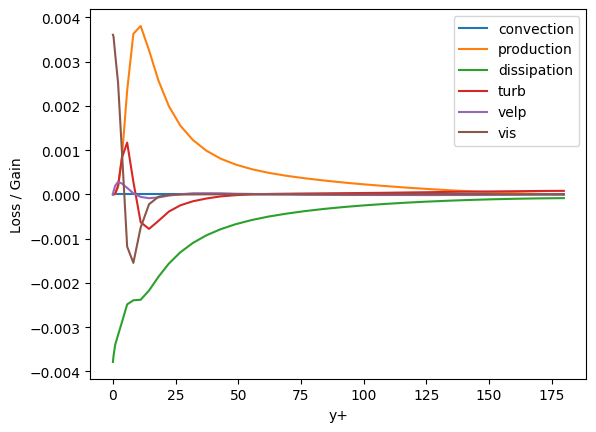

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Load the energy data
energy = np.loadtxt('stat_bud.data')

# Load labels from stat_bud.in file
labels = []
with open('stat_bud.in', 'r') as f:
    for line in f:
        parts = line.split()
        labels.append(parts[1])

# Determine the dimensions of avg_energy
num_yp = len(yp)
num_components = len(labels) + 1  # Including yp

# Initialize avg_energy with determined dimensions
avg_energy = np.ones((num_yp, num_components))

# Store yp values in the first column
avg_energy[:, 0] = yp

# Compute average energy
# Compute average energy
for i in range(1, num_components):
    avg_energy[:, i] = (energy[:ny//2, i] + energy[ny-1:ny//2:-1, i]) / 2


# Plot the data
for i in range(1, num_components):
    plt.plot(yp, avg_energy[:, i], label=labels[i-1], linestyle='-')

plt.xlabel("y+")
plt.ylabel("Loss / Gain")
plt.legend()
plt.show()


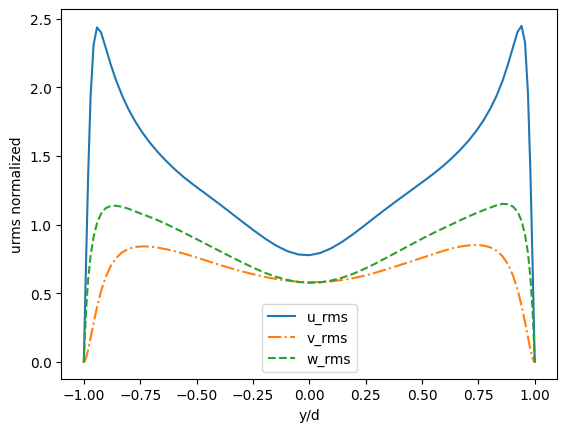

In [8]:
labels = ['u_rms', 'v_rms', 'w_rms']
linestyles = ['-', '-.', '--']

for i in range(len(labels)):
    y_over_d = stat[:, 0]  
    rms_normalized = stat[:, 4 + i] / utau
    plt.plot(y_over_d, rms_normalized, label=labels[i], linestyle=linestyles[i])

plt.ylabel('urms normalized')
plt.xlabel('y/d')
plt.legend()
plt.show()

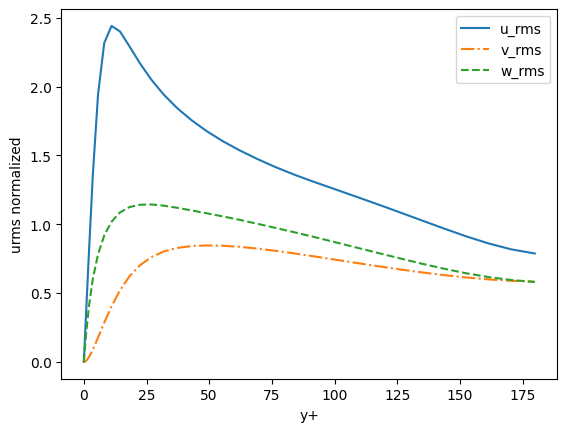

In [9]:
# Calculate velocity RMS normalized by wall shear velocity
vel_rms = np.zeros((len(yp), len(labels)))
linestyles = ['-', '-.', '--']

for i in range(len(labels)):
  vel_rms[:, i] = (stat[:, 4 + i][:ny//2] + stat[:, 4 + i][ny-1:ny//2:-1]) / 2 / utau

# Plot velocity RMS
for i in range(len(labels)):
    plt.plot(yp, vel_rms[:, i], label=labels[i], linestyle=linestyles[i])

plt.ylabel('urms normalized')
plt.xlabel('y+')
plt.legend()
plt.show()



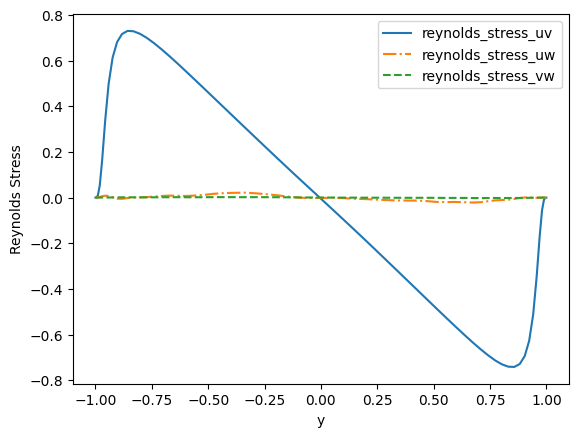

In [10]:
labels=['reynolds_stress_uv','reynolds_stress_uw','reynolds_stress_vw']

lines=['-','-.','--']
for i in range(len(labels)):
    y_values = stat[:, 0] 
    stress_values = -stat[:, 7 + i] / (utau * utau) 
    plt.plot(y_values, stress_values, label=labels[i], linestyle=linestyles[i])
plt.xlabel('y')
plt.ylabel('Reynolds Stress')
plt.legend()
plt.show()

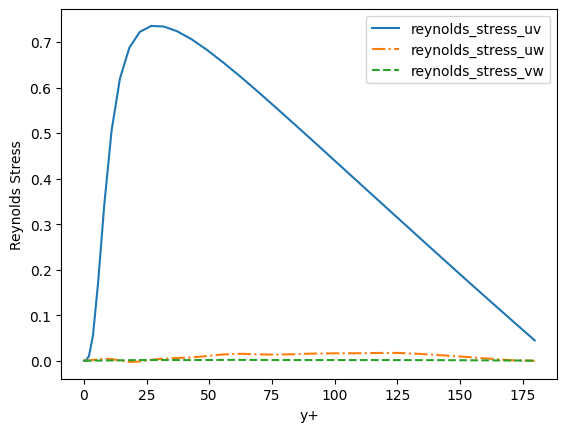

In [11]:
stress = np.zeros((len(yp), len(labels)))

# Calculate Reynolds Stress
for i in range(len(labels)):
    first_half = stat[:, 7 + i][:ny//2]
    second_half_reversed = -stat[:, 7 + i][ny-1:ny//2:-1]
    stress[:, i] = -((first_half + second_half_reversed) / 2) / (utau * utau)

# Plot Reynolds Stress
for i in range(len(labels)):
    plt.plot(yp, stress[:, i], label=labels[i], linestyle=lines[i])

# Set labels and legend
plt.xlabel('y+')
plt.ylabel('Reynolds Stress')
plt.legend()
plt.show()

